**CASE STUDY : FASHION CLASS CLASSIFICATION USING CNN**

# OBJECTIVE

In this case study we'll look at a hypothetical situation. We assume that if a retailer hired you to build a virtual stylist assistant that looks at customer Instagram and Facebook images and classifies what fashion category they are wearing either bags dresses and pants. The virtual assistant can help the retailer detect and forecast fashion trends and launch targeted marketing campaigns.

In this story we're going to use the fashionmnist data. It's a data set that contains images of bags shoes and dresses. And we're asking the deep network to classify the images into 10 classes.

So we wanted to build kind of an app per se or a model. They can look at images and can tell us exactly what category in this image. Is it like a short. Is it a bag. Is it like a hat. And so on.

Each Image is 28 pixel in hight and 28 pixel in width, for a total of 784 pixels in total. Each pixel has a single Pixel value associated with it, indicating the lightness or darkness of the pixel. Higher number means darker piexl. The pixel value is an integer Between 0 and 255

# IMPORT THE LIBARIES

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import the necessary packages
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Resizing, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from sklearn.model_selection import train_test_split

from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import random
import cv2
import os

import warnings
from tqdm import tqdm_notebook as tqdm
import itertools

import tensorflow as tf 
print(tf.__version__)
warnings.filterwarnings("ignore")
SEED = 42   # set random seed

2.9.2


In [3]:
# change the working DIR
os.chdir("/content/drive/MyDrive/CNN/Fashion Class ClassIfication Using CNN")

In [4]:
!dir

archive  archive.zip  Fashion_Class_Classification_Using_CNN.ipynb


In [5]:
# Extract dataset.rar file 
#!pip install patool  

In [6]:
#import patoolib
#patoolib.extract_archive("archive.zip")

In [7]:
!dir

archive  archive.zip  Fashion_Class_Classification_Using_CNN.ipynb


In [8]:
os.chdir("/content/drive/MyDrive/CNN/Fashion Class ClassIfication Using CNN/archive")

In [9]:
!dir

fashion-mnist_test.csv	 t10k-images-idx3-ubyte  train-images-idx3-ubyte
fashion-mnist_train.csv  t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


In [10]:
train_df=pd.read_csv("fashion-mnist_train.csv")

In [11]:
test_df = pd.read_csv("fashion-mnist_test.csv")

In [12]:
train_df.shape

(60000, 785)

In [13]:
test_df.shape

(10000, 785)

# VISUALIZATION OF THE DATA 

In [14]:
pd.set_option("display.max_columns",None)
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

 Each obsertvation is image. the orignal image is converted into the each individual pixel so 28*28=784 pixel

# Create training and testing array so we can actually explore these arrays and view or visualize the data 

In [15]:
training = np.array(train_df, dtype="float32")
testing =np.array(test_df, dtype = "float32")

# Data visualization

Visuzlize just once image in the form of 28 by 28 pixel

1.0


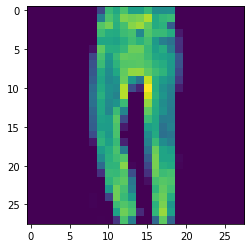

In [16]:
import random
i=random.randint(1,60000)

plt.imshow(training[i,1:].reshape(28,28))
Label=training[i,0]
print(Label)

The top 10 callases as follows :

0 -> T-shirts

1 -> Trouser

2 -> Pullover

3 -> Dress

4 -> Coat

5 -> Sandel

6 -> Shirt

7 -> Sneaker

8 -> Bag

9 -> Ankle boot

# View more image in a grid format

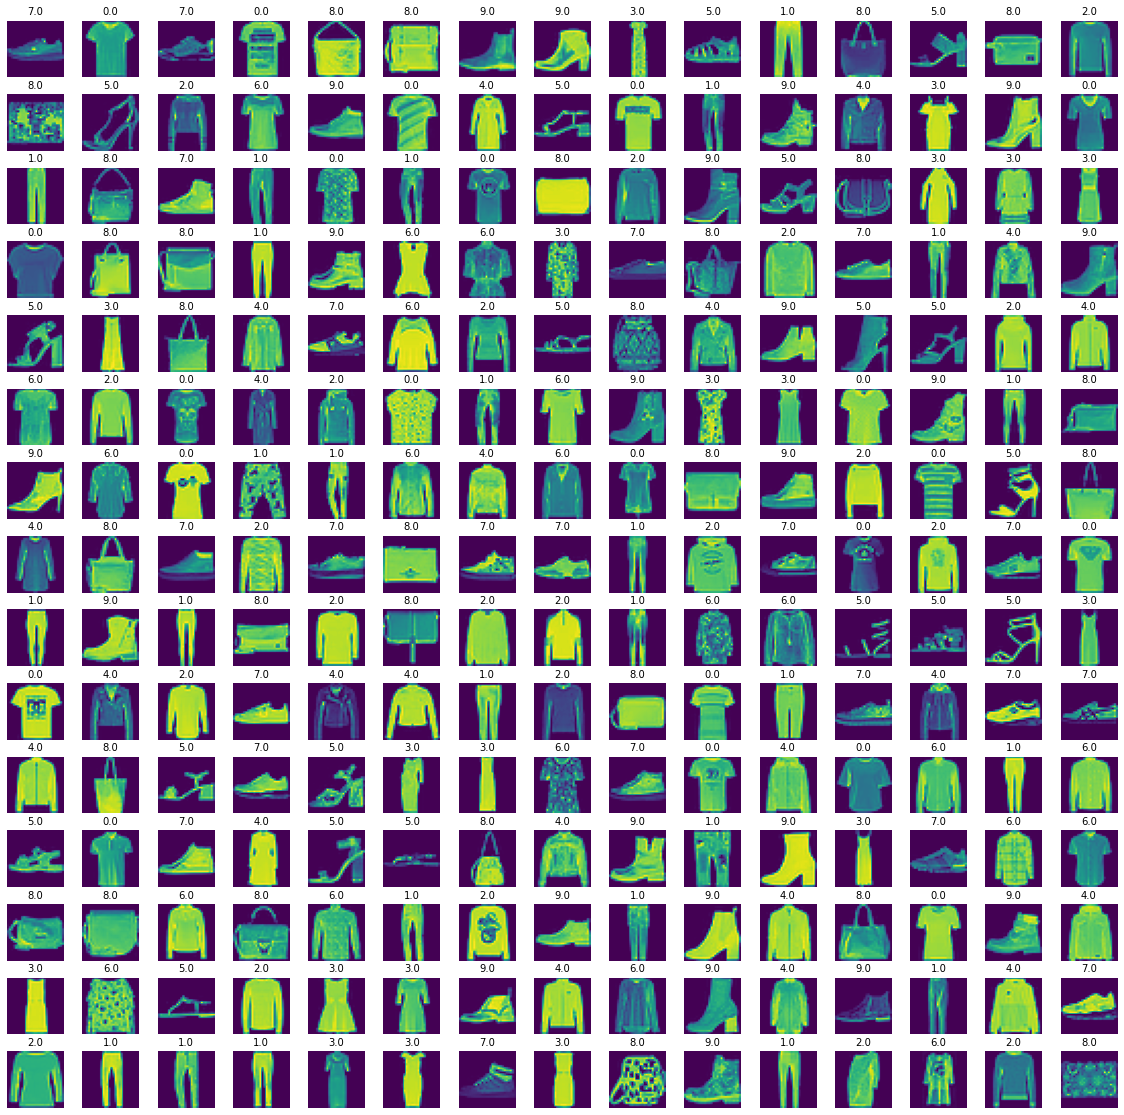

In [17]:
# Define the dimention of the plot grid
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid , figsize = (20,20))

axes=axes.ravel() # flatern the 15 x 15 matrix into 255 array

n_training = len(training) # get the lenght of the training dataset 

#select a random number from 0 to n_training
for i in np.arange(0, w_grid*l_grid) : # create evenly space variables
    
    # Select a random number 
    index = np.random.randint(0, n_training)
    # read and display the image with the selected index
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.3)

# Data Partition 

In [18]:
Pixel_train = train_df.iloc[:,1:]/255 # to normalize the data 
labels_train = train_df["label"]

Pixel_test = test_df.iloc[:,1:]/255 # to normalize the data 
labels_test = test_df["label"]

In [19]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(Pixel_train ,labels_train, test_size=0.2, random_state=1234)

In [20]:
print(f"shape of X_train : {X_train.shape} ")
print(f"shape of X_test : {X_test.shape} ")
print(f"shape of Y_train : {Y_train.shape} ")
print(f"shape of X_test : {X_test.shape} ")

shape of X_train : (48000, 784) 
shape of X_test : (12000, 784) 
shape of Y_train : (48000,) 
shape of X_test : (12000, 784) 


# Change Dimention

Take training , testing and validation data and put them in a form that we can actually feed to our deep network.

We have all our data in an array format and kind of matrix format. Now we need to reshape our data to be in a form of twenty eight by twenty eight by one.

Because that's the form that our convolutional neural network was going to accepting the data.

In [21]:
X_train = X_train.values.reshape(X_train.values.shape[0], 28, 28, 1)
X_test = X_test.values.reshape(X_test.values.shape[0], 28, 28, 1)

In [22]:
print(f"shape of X_train :{ X_train.shape}")
print(f"shape of X_test: {X_test.shape}")

shape of X_train :(48000, 28, 28, 1)
shape of X_test: (12000, 28, 28, 1)


# Creating CNN Model 

In [23]:
cnn_model = Sequential()
#32 kernals of 3 x 3 size and 
#the inpute image is 28 x 28 x1, and the activation function is Rectifire
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),padding="valid",activation = "relu")) 

# add max pooling layer of 2 x2 size 
cnn_model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# Second set of CONV=> RELU => Pool Layer 
#cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = "relu"))
#cnn_model.add(MaxPooling2D(pool_size=(2,2),padding="same",strides=(2,2)))

# flatten the model 
cnn_model.add(Flatten())

# Add dense function
cnn_model.add(Dense(128))
cnn_model.add(Activation("relu"))
#cnn_model.add(Dense(84))
#cnn_model.add(Activation("relu"))
# Add output layer
#cnn_model.add(Dense(output_dim = 10 ,  Activation = 'sigmoid'))

cnn_model.add(Dense(units=10, activation='softmax'))

In [24]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

# Training the model 

In [25]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

we use categoral crossentropy because we are simply categorizing our data set out of 10 samples simply. ints not like a binary cross entopy we can use but if we have only 0 an 1

In [26]:
epochs = 50
#Epochs means how many times we are going to presenting our data set and updating the weights as we go.

# Apply a fit method to our cnn model

In [27]:
# train the network
print("[INFO] training network...")
H = cnn_model.fit(X_train, Y_train, batch_size=512,
              validation_data=(X_test, Y_test), 
              steps_per_epoch=len(X_train) // 512,
              epochs=50, 
              verbose=1)

[INFO] training network...
Epoch 1/50
93/93 [==============================] - 5s 39ms/step - loss: 1.1144 - accuracy: 0.6516 - val_loss: 0.6898 - val_accuracy: 0.7444
Epoch 2/50
93/93 [==============================] - 3s 32ms/step - loss: 0.6275 - accuracy: 0.7692 - val_loss: 0.5797 - val_accuracy: 0.7863
Epoch 3/50
93/93 [==============================] - 3s 32ms/step - loss: 0.5541 - accuracy: 0.7962 - val_loss: 0.5411 - val_accuracy: 0.7922
Epoch 4/50
93/93 [==============================] - 3s 32ms/step - loss: 0.5107 - accuracy: 0.8133 - val_loss: 0.4985 - val_accuracy: 0.8156
Epoch 5/50
93/93 [==============================] - 3s 32ms/step - loss: 0.4809 - accuracy: 0.8254 - val_loss: 0.4705 - val_accuracy: 0.8273
Epoch 6/50
93/93 [==============================] - 3s 32ms/step - loss: 0.4616 - accuracy: 0.8331 - val_loss: 0.4519 - val_accuracy: 0.8354
Epoch 7/50
93/93 [==============================] - 3s 32ms/step - loss: 0.4366 - accuracy: 0.8415 - val_loss: 0.4369 - val_acc

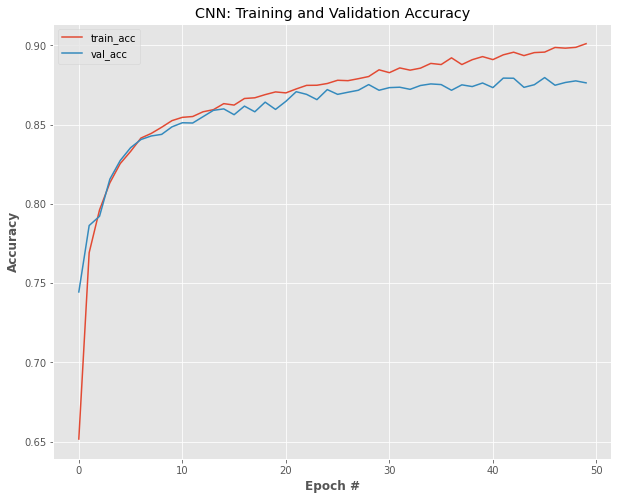

In [28]:
# plot the training and validation accuracy
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("CNN: Training and Validation Accuracy")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

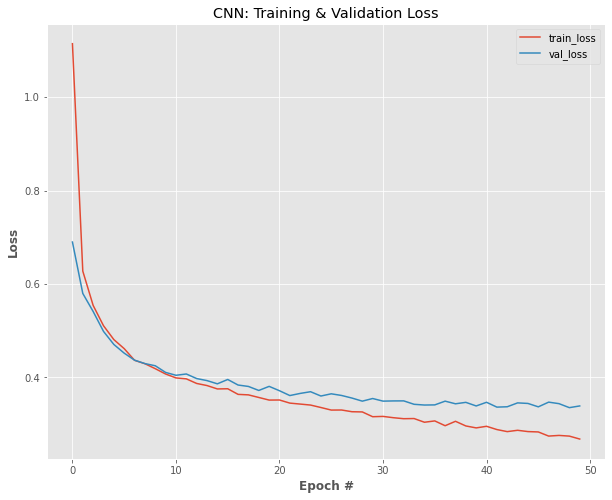

In [29]:
# plot the training and validation loss
N = np.arange(0, 50)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("CNN: Training & Validation Loss")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

# Evaluating  the Model 

In [30]:
evaluation = cnn_model.evaluate(X_test, Y_test)
print('TEST ACCURACY : {:.3F}'.format(evaluation[1]))

375/375 [==============================] - 1s 3ms/step - loss: 0.3389 - accuracy: 0.8763
TEST ACCURACY : 0.876


# Predicting on test Data 

In [31]:
#Pixel_test = test_df.iloc[:,1:]/255 # to normalize the data 
#labels_test = test_df["label"]

print(Pixel_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


In [32]:
# Changeing the dimention 
Pixel_test = Pixel_test.values.reshape(Pixel_test.values.shape[0], 28, 28, 1)

In [33]:
Pixel_test.shape

(10000, 28, 28, 1)

In [34]:
Y_pred=cnn_model.predict(Pixel_test).round(2)

313/313 [==============================] - 1s 2ms/step


In [35]:
Y_pred

array([[0.98, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.87, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 0.99, 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

# Visualize Output

In [36]:
class_labels = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","boot"]
'''
0 => T-shirt
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt\n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

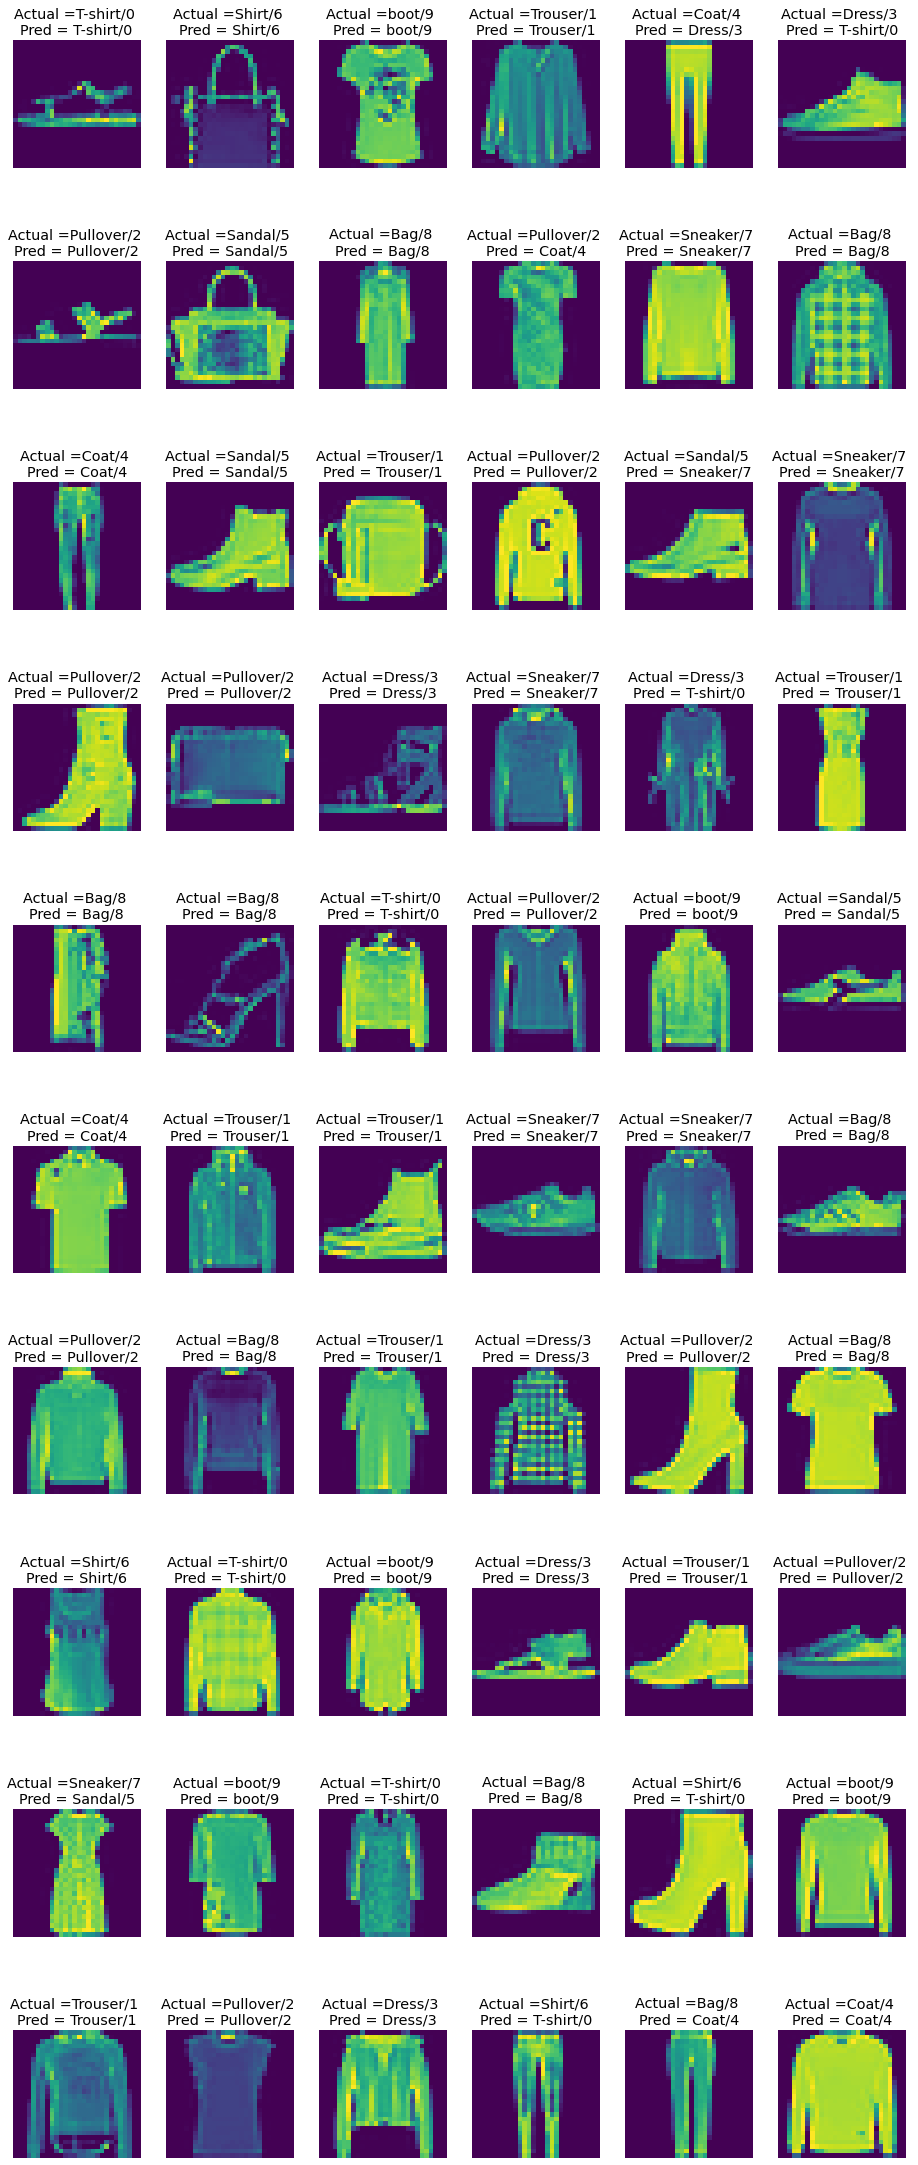

In [37]:
plt.figure(figsize=(16,40))

j=1
for i in np.random.randint(0,1000,60):
    plt.subplot(10,6,j); j+=1
    plt.imshow(X_test[i].reshape(28,28))
    plt.title("Actual ={}/{} \nPred = {}/{}".format(class_labels[labels_test[i]],labels_test[i],class_labels[np.argmax(Y_pred[i])],np.argmax(Y_pred[i])))
    plt.axis("off")

These are actual classes and they predicted for the testing dataset

Print kind of grid that can tell us ok this my image this is my true label and this my predicted lab

# Confusion matrix 

In [38]:
import seaborn as sns

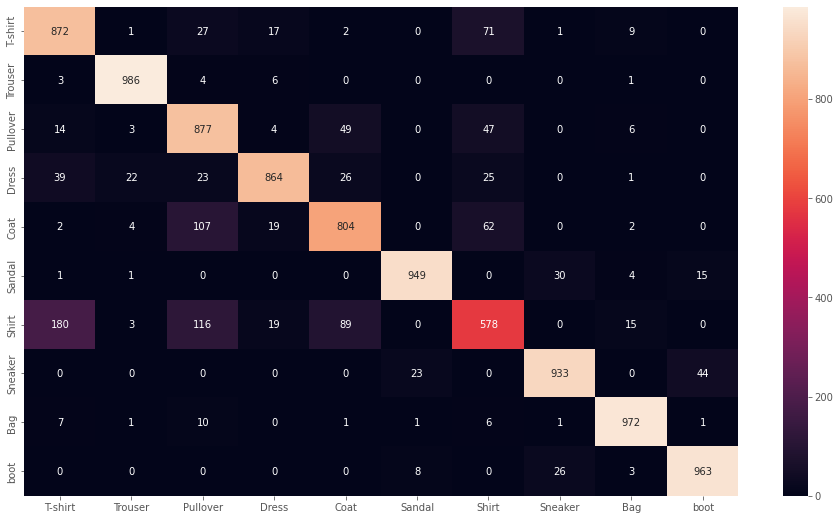

In [39]:
from sklearn. metrics import confusion_matrix 

plt.figure(figsize=(16,9))
y_pred1= [np.argmax(label) for label in Y_pred]
cm=confusion_matrix(labels_test,y_pred1)

# show cm 
sns.heatmap(cm,annot=True, fmt = "d", xticklabels = class_labels, yticklabels=class_labels )

In [40]:
from sklearn.metrics import classification_report 
cr = classification_report(labels_test,y_pred1,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

     T-shirt       0.78      0.87      0.82      1000
     Trouser       0.97      0.99      0.98      1000
    Pullover       0.75      0.88      0.81      1000
       Dress       0.93      0.86      0.90      1000
        Coat       0.83      0.80      0.82      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.73      0.58      0.65      1000
     Sneaker       0.94      0.93      0.94      1000
         Bag       0.96      0.97      0.97      1000
        boot       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Improving the model
Improve accuracy by adding more feature detectors/fillters or adding a dropout

64 kernals of 3 x 3 size and the inpute image is 28 x 28 x1, and the activation function is Rectifire

set kernal = 64 and rerun the above code and check the accuracy

# Building Complex model -CNN

In [41]:
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation ="relu", padding="valid", strides=(1,1)))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model2.add(Conv2D(64, (3, 3), activation ="relu", padding="same", strides=(1,1)))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model2.add(Flatten())
cnn_model2.add(Dense(units=128, activation="relu"))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Dense(units=256, activation="relu"))
cnn_model2.add(Dropout(0.25))
cnn_model2.add(Dense(units=128, activation="relu"))
cnn_model2.add(Dense(units=10, activation="softmax"))


In [42]:
cnn_model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [43]:
# complie the model
cnn_model2.compile(loss = 'sparse_categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [44]:
EarlyStop = EarlyStopping(patience=10)

In [45]:
# train the model 
# train the network
print("[INFO] training network...")
H2 = cnn_model2.fit(X_train, Y_train, batch_size=512,
              validation_data=(X_test, Y_test), 
              steps_per_epoch=len(X_train) // 512,
              epochs=50,
              callbacks=[EarlyStop],
              verbose=1)


[INFO] training network...
Epoch 1/50
93/93 [==============================] - 48s 511ms/step - loss: 0.8823 - accuracy: 0.6716 - val_loss: 0.5169 - val_accuracy: 0.7949
Epoch 2/50
93/93 [==============================] - 48s 513ms/step - loss: 0.4914 - accuracy: 0.8165 - val_loss: 0.4071 - val_accuracy: 0.8503
Epoch 3/50
93/93 [==============================] - 47s 506ms/step - loss: 0.4086 - accuracy: 0.8508 - val_loss: 0.3631 - val_accuracy: 0.8637
Epoch 4/50
93/93 [==============================] - 47s 509ms/step - loss: 0.3577 - accuracy: 0.8717 - val_loss: 0.3314 - val_accuracy: 0.8775
Epoch 5/50
93/93 [==============================] - 48s 511ms/step - loss: 0.3254 - accuracy: 0.8818 - val_loss: 0.2949 - val_accuracy: 0.8925
Epoch 6/50
93/93 [==============================] - 59s 635ms/step - loss: 0.3047 - accuracy: 0.8905 - val_loss: 0.2742 - val_accuracy: 0.8982
Epoch 7/50
93/93 [==============================] - 47s 507ms/step - loss: 0.2829 - accuracy: 0.8980 - val_loss: 0.

In [46]:
cnn_model2.evaluate(X_test,Y_test)

375/375 [==============================] - 5s 12ms/step - loss: 0.2763 - accuracy: 0.9193


[0.27630797028541565, 0.9193333387374878]

# ResNet50

In [48]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input, Conv2D, Resizing, AveragePooling2D, Flatten, Dropout, GlobalAveragePooling2D

In [51]:
resnet=ResNet50(include_top=False,input_shape=(224,224,3),weights="imagenet")
for layer in resnet.layers[:]:
    layer.trainable=False

In [52]:
resnet_model_input = Input(shape=(28,28, 1))
resnet_output = Resizing(height = 224, width = 224)(resnet_model_input)
resnet_oneToThreeChannel = Conv2D(filters = 3, kernel_size = (1, 1), strides = (1, 1), use_bias = False, kernel_initializer = "Ones")
resnet_oneToThreeChannel.trainable = False 
resnet_output = resnet_oneToThreeChannel(resnet_output)
resnet_output = resnet(resnet_output)
resnet_output = GlobalAveragePooling2D()(resnet_output)
resnet_output = Dense(10, activation = "softmax")(resnet_output)
resnet_model = Model(resnet_model_input, resnet_output)
resnet_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 3)       3         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_6 (Dense)             (None, 10)                20490     
                                                             

In [53]:
resnet_model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(0.003), metrics=["accuracy"])




In [ ]:
EarlyStop = EarlyStopping(patience = 10)
history = resnet_model.fit(X_train, Y_train, batch_size = 512 ,epochs = 20, verbose = 1, callbacks = [EarlyStop], validation_data=(X_test, Y_test))

Epoch 1/20
44/94 [=============>................] - ETA: 1:07:23 - loss: 2.1235 - accuracy: 0.2632

# Save Model 

In [ ]:

path ="/content/drive/MyDrive/CNN/Fashion Class ClassIfication Using CNN/fashion_classification_cnn_model.h5"


model.save(path)




In [ ]:
model_deploy = keras.models.load_model("fashion_classification_cnn_model.h5")